In [1]:
# data exploration and visualization

import pandas as pd 
import numpy as np 

import os
import matplotlib.pyplot as plt
%matplotlib inline 

plt.rcParams["font.size"]=24

import seaborn as sns

sns.set(font_scale=2)

from IPython.core.pylabtools import figsize


# for saving the all the images we creat in this program

root_dir = "."
project_id = "Abseentism"
image_path = os.path.join(root_dir,"images",project_id)

def save_fig(fig_id, tight_layout=True, extension="png", dim=300):
    os.makedirs(image_path,exist_ok=True)
    fig_path = os.path.join(image_path,fig_id+"."+extension)
    print("saving ...."+fig_id)
    if tight_layout:
        plt.tight_layout()
        plt.savefig(fig_id, format=extension, dpi=dim)
        
#Ignore all the warnings        
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Absenteeism_at_work.csv", sep = ';')

In [3]:
data.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

# Data Cleaning and Preprocessing

In [5]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [6]:
data.columns=data.columns.str.replace(' ','')

In [7]:
data.columns

Index(['ID', 'Reasonforabsence', 'Monthofabsence', 'Dayoftheweek', 'Seasons',
       'Transportationexpense', 'DistancefromResidencetoWork', 'Servicetime',
       'Age', 'WorkloadAverage/day', 'Hittarget', 'Disciplinaryfailure',
       'Education', 'Son', 'Socialdrinker', 'Socialsmoker', 'Pet', 'Weight',
       'Height', 'Bodymassindex', 'Absenteeismtimeinhours'],
      dtype='object')

In [8]:
data.describe()

,ID,Reasonforabsence,Monthofabsence,Dayoftheweek,Seasons,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverage/day,...,Disciplinaryfailure,Education,Son,Socialdrinker,Socialsmoker,Pet,Weight,Height,Bodymassindex,Absenteeismtimeinhours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
data['ID'].nunique()

36

In [11]:
data['ID'].value_counts()

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
6       8
9       8
23      8
27      7
30      7
12      7
7       6
2       6
29      5
26      5
32      5
31      3
19      3
21      3
16      2
8       2
35      1
4       1
Name: ID, dtype: int64

In [12]:
#let us see the no of unique values in the data 
for i in data.columns:
    print(i,'-',len(data[i].value_counts()))

ID - 36
Reasonforabsence - 28
Monthofabsence - 13
Dayoftheweek - 5
Seasons - 4
Transportationexpense - 24
DistancefromResidencetoWork - 25
Servicetime - 18
Age - 22
WorkloadAverage/day - 38
Hittarget - 13
Disciplinaryfailure - 2
Education - 4
Son - 5
Socialdrinker - 2
Socialsmoker - 2
Pet - 6
Weight - 26
Height - 14
Bodymassindex - 17
Absenteeismtimeinhours - 19


In [13]:
#converting appropriate categorical variable into actual categorical variable 

data['ID']=data['ID'].astype('category')
data['Reasonforabsence']=data['Reasonforabsence'].astype('category')
data['Monthofabsence']=data['Monthofabsence'].astype('category')
data['Dayoftheweek']=data['Dayoftheweek'].astype('category')
data['Seasons']=data['Seasons'].astype('category')
data['Disciplinaryfailure']=data['Disciplinaryfailure'].astype('category')
data['Education']=data['Education'].astype('category')
data['Son']=data['Son'].astype('category')
data['Socialdrinker']=data['Socialdrinker'].astype('category')
data['Socialsmoker']=data['Socialsmoker'].astype('category')
data['Pet']=data['Pet'].astype('category')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   ID                           740 non-null    category
 1   Reasonforabsence             740 non-null    category
 2   Monthofabsence               740 non-null    category
 3   Dayoftheweek                 740 non-null    category
 4   Seasons                      740 non-null    category
 5   Transportationexpense        740 non-null    int64   
 6   DistancefromResidencetoWork  740 non-null    int64   
 7   Servicetime                  740 non-null    int64   
 8   Age                          740 non-null    int64   
 9   WorkloadAverage/day          740 non-null    float64 
 10  Hittarget                    740 non-null    int64   
 11  Disciplinaryfailure          740 non-null    category
 12  Education                    740 non-null    category
 13  Son  

saving ....Absenteeismtimeinhours


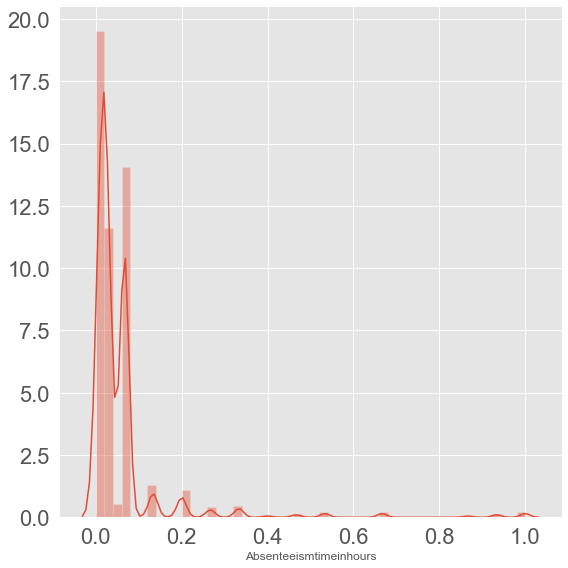

In [77]:
figsize(8,8)
df=data.dropna() 
sns.distplot(df['Absenteeismtimeinhours'])
save_fig("Absenteeismtimeinhours")

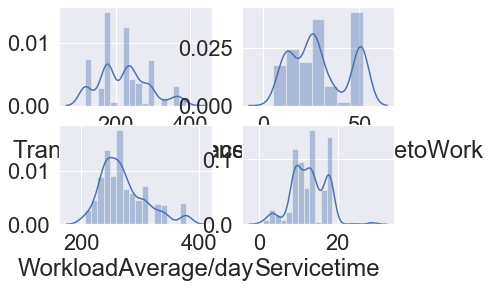

In [18]:
plt.figure(1)
plt.subplot(221)
sns.distplot(df['Transportationexpense'])


plt.subplot(222)
sns.distplot(df['DistancefromResidencetoWork'])


plt.subplot(223)
sns.distplot(df['WorkloadAverage/day'])


plt.subplot(224)
sns.distplot(df['Servicetime'])


saving ....Age
saving ....Weight
saving ....Hittarget
saving ....Height


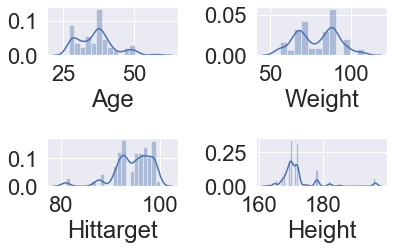

In [19]:
plt.figure(1)
plt.subplot(221)
sns.distplot(df['Age'])
save_fig("Age")

plt.subplot(222)
sns.distplot(df['Weight'])
save_fig("Weight")

plt.subplot(223)
sns.distplot(df['Hittarget'])
save_fig("Hittarget")

plt.subplot(224)
sns.distplot(df['Height'])
save_fig("Height")

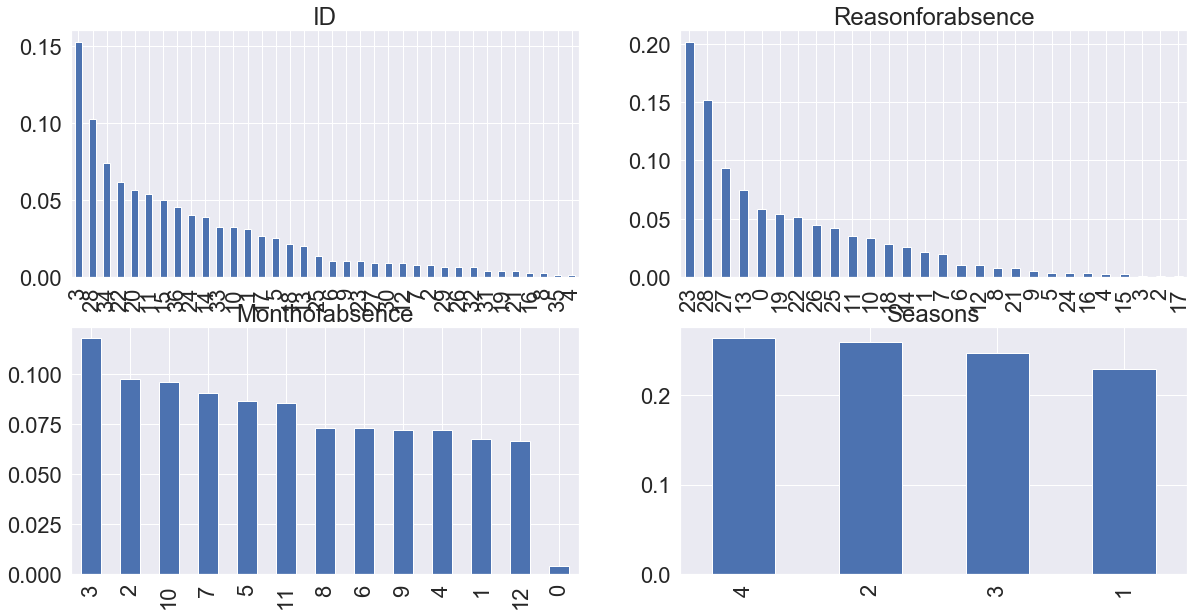

In [20]:
#let us see categorical variables

figsize(10,10)
plt.figure(1)
plt.subplot(221)
data['ID'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'ID')

plt.subplot(222)
data['Reasonforabsence'].value_counts(normalize=True).plot.bar(title= 'Reasonforabsence')

plt.subplot(223)
data['Monthofabsence'].value_counts(normalize=True).plot.bar(title= 'Monthofabsence')

plt.subplot(224)
data['Seasons'].value_counts(normalize=True).plot.bar(title= 'Seasons')

plt.show()

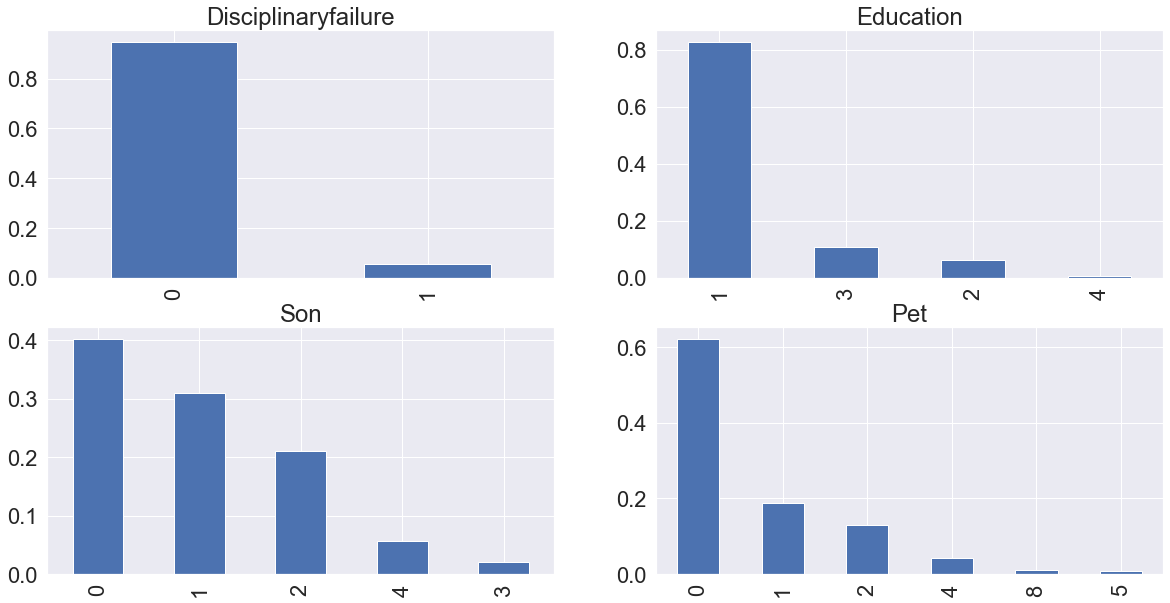

In [21]:
plt.figure(1)
plt.subplot(221)
data['Disciplinaryfailure'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Disciplinaryfailure')

plt.subplot(222)
data['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(223)
data['Son'].value_counts(normalize=True).plot.bar(title= 'Son')

plt.subplot(224)
data['Pet'].value_counts(normalize=True).plot.bar(title= 'Pet')

plt.show()

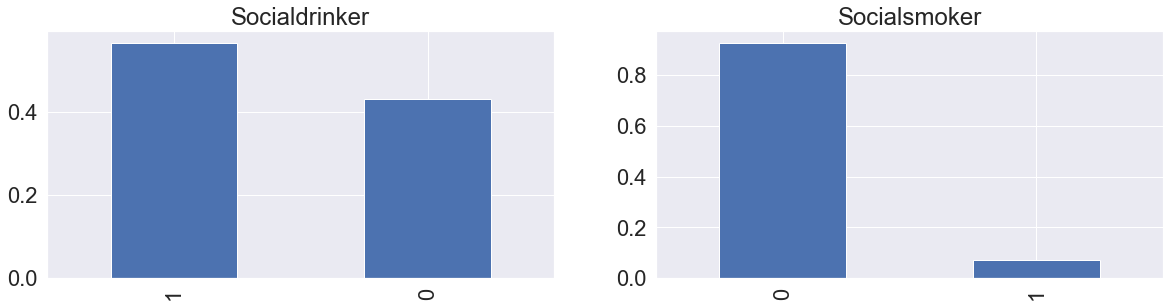

In [22]:
plt.figure(1)
plt.subplot(221)
data['Socialdrinker'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Socialdrinker')

plt.subplot(222)
data['Socialsmoker'].value_counts(normalize=True).plot.bar(title= 'Socialsmoker')

#there are many employees who doesnt smokw

In [23]:
#bivariate
data.columns

Index(['ID', 'Reasonforabsence', 'Monthofabsence', 'Dayoftheweek', 'Seasons',
       'Transportationexpense', 'DistancefromResidencetoWork', 'Servicetime',
       'Age', 'WorkloadAverage/day', 'Hittarget', 'Disciplinaryfailure',
       'Education', 'Son', 'Socialdrinker', 'Socialsmoker', 'Pet', 'Weight',
       'Height', 'Bodymassindex', 'Absenteeismtimeinhours'],
      dtype='object')

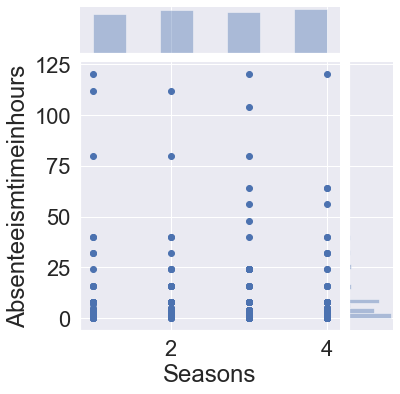

In [24]:
sns.jointplot(x='Seasons',y='Absenteeismtimeinhours',data=data)

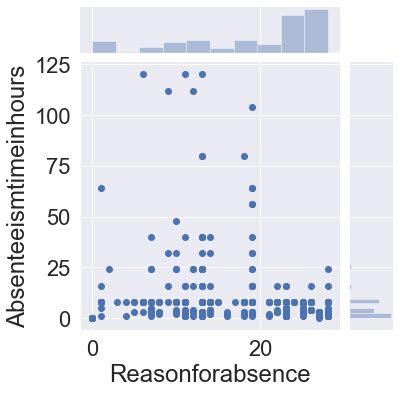

In [25]:
sns.jointplot(x='Reasonforabsence',y='Absenteeismtimeinhours',data=data)

In [26]:
reason = data.groupby('Reasonforabsence')

In [27]:
reason['Absenteeismtimeinhours'].max()

Reasonforabsence
0       0
1      64
2      24
3       8
4       8
5       8
6     120
7      40
8       8
9     112
10     48
11    120
12    112
13    120
14     40
15      8
16      3
17      8
18     80
19    104
21      8
22     16
23     16
24      8
25      8
26     16
27      3
28     24
Name: Absenteeismtimeinhours, dtype: int64

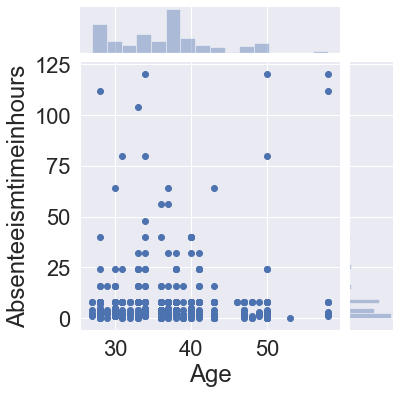

In [28]:
sns.jointplot(x='Age',y='Absenteeismtimeinhours',data=data)

<Figure size 864x432 with 0 Axes>

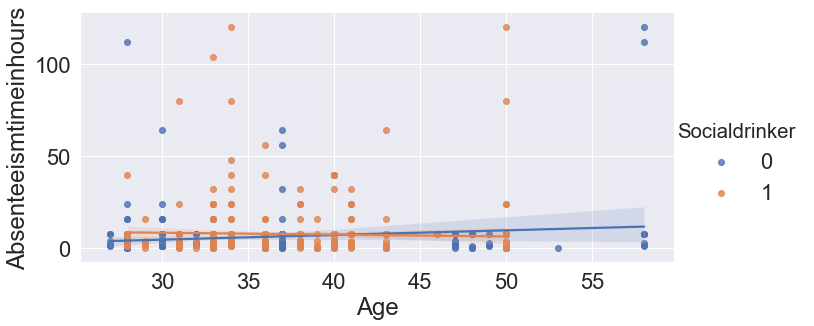

In [29]:
plt.figure(figsize=(12,6))
sns.lmplot(x='Age',y='Absenteeismtimeinhours',data=data,hue='Socialdrinker',size=5,aspect=2)

<Figure size 864x432 with 0 Axes>

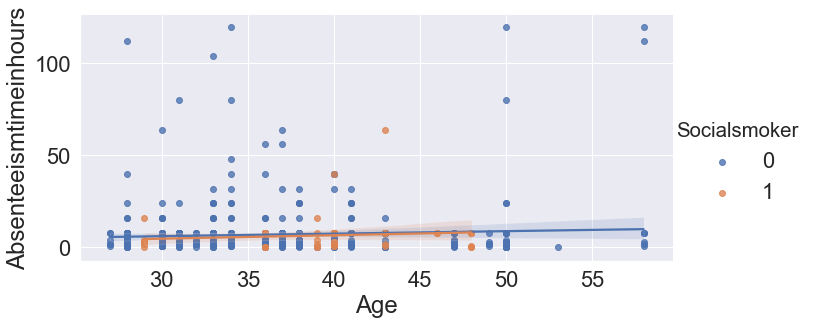

In [30]:
plt.figure(figsize=(12,6))
sns.lmplot(x='Age',y='Absenteeismtimeinhours',data=data,hue='Socialsmoker',size=5,aspect=2)

<Figure size 864x432 with 0 Axes>

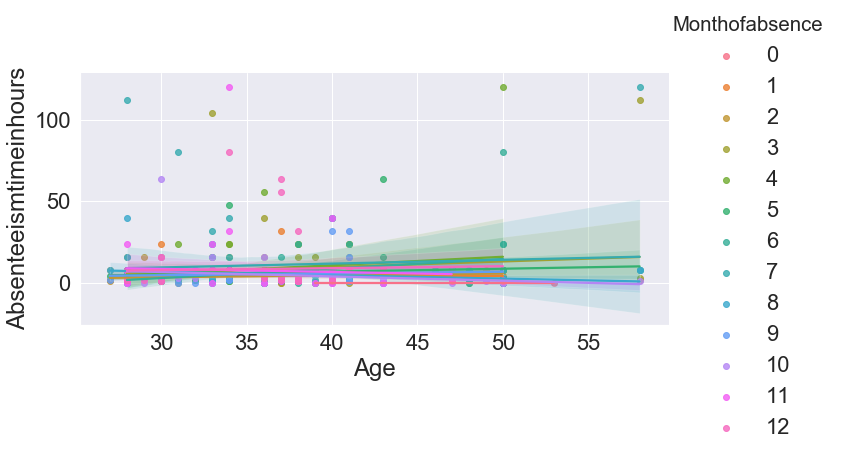

In [31]:
plt.figure(figsize=(12,6))
sns.lmplot(x='Age',y='Absenteeismtimeinhours',data=data,hue='Monthofabsence',size=5,aspect=2)

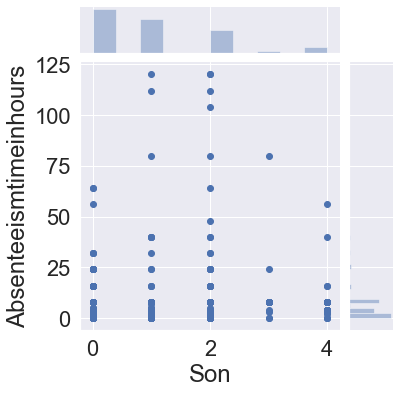

In [32]:
sns.jointplot(x='Son',y='Absenteeismtimeinhours',data=data)

In [33]:
# Missing Values

data.isnull().sum()

ID                             0
Reasonforabsence               0
Monthofabsence                 0
Dayoftheweek                   0
Seasons                        0
Transportationexpense          0
DistancefromResidencetoWork    0
Servicetime                    0
Age                            0
WorkloadAverage/day            0
Hittarget                      0
Disciplinaryfailure            0
Education                      0
Son                            0
Socialdrinker                  0
Socialsmoker                   0
Pet                            0
Weight                         0
Height                         0
Bodymassindex                  0
Absenteeismtimeinhours         0
dtype: int64

In [34]:
data.head(20)

,ID,Reasonforabsence,Monthofabsence,Dayoftheweek,Seasons,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverage/day,...,Disciplinaryfailure,Education,Son,Socialdrinker,Socialsmoker,Pet,Weight,Height,Bodymassindex,Absenteeismtimeinhours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


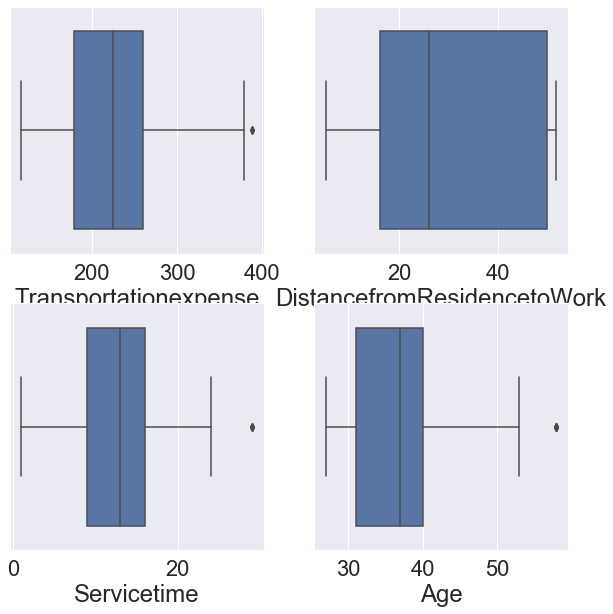

In [35]:
# Outlier Analysis

plt.subplot(221)
sns.boxplot(data['Transportationexpense'])

plt.subplot(222)
sns.boxplot(data['DistancefromResidencetoWork'])

plt.subplot(223)
sns.boxplot(data['Servicetime'])

plt.subplot(224)
sns.boxplot(data['Age'])

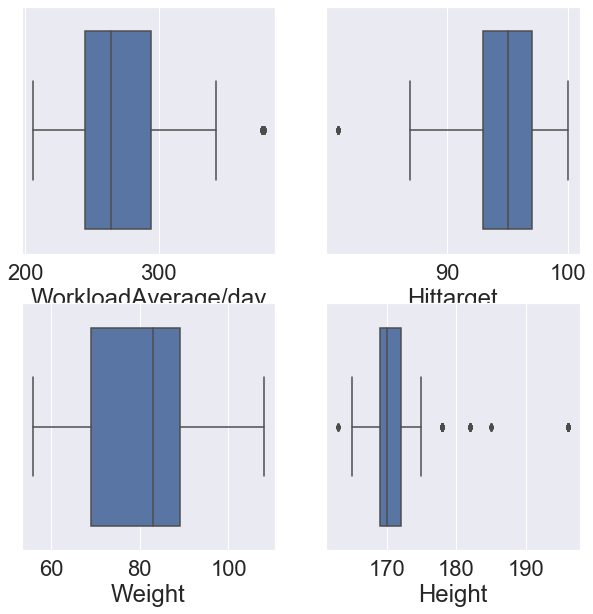

In [36]:
plt.figure(1)
plt.subplot(221)
sns.boxplot(data['WorkloadAverage/day'])

plt.subplot(222)
sns.boxplot(data['Hittarget'])

plt.subplot(223)
sns.boxplot(data['Weight'])

plt.subplot(224)
sns.boxplot(data['Height'])

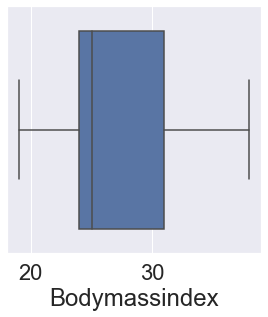

In [37]:
plt.subplot(221)
sns.boxplot(data['Bodymassindex'])

In [38]:
#let us get all the variables having outliers in a single list

coutlier= ["Transportationexpense","Servicetime","Age","WorkloadAverage/day","Hittarget","Height"]

In [39]:
coutlier

['Transportationexpense',
 'Servicetime',
 'Age',
 'WorkloadAverage/day',
 'Hittarget',
 'Height']

In [40]:
for i in coutlier:
    #print(i)
    q75, q25 = np.percentile(data.loc[:,i], [75 ,25])
    iqr = q75 - q25
    minn = q25 - (iqr*1.5)
    maxx = q75 + (iqr*1.5)
#Converting to nan
    data.loc[data.loc[:,i] < minn,i] = np.nan
    data.loc[data.loc[:,i] > maxx,i] = np.nan
    print('{var} - {X} '.format(var = i, X = (data.loc[:,i].isnull().sum())))

Transportationexpense - 3 
Servicetime - 5 
Age - 8 
WorkloadAverage/day - 32 
Hittarget - 19 
Height - 119 


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   ID                           740 non-null    category
 1   Reasonforabsence             740 non-null    category
 2   Monthofabsence               740 non-null    category
 3   Dayoftheweek                 740 non-null    category
 4   Seasons                      740 non-null    category
 5   Transportationexpense        737 non-null    float64 
 6   DistancefromResidencetoWork  740 non-null    int64   
 7   Servicetime                  735 non-null    float64 
 8   Age                          732 non-null    float64 
 9   WorkloadAverage/day          708 non-null    float64 
 10  Hittarget                    721 non-null    float64 
 11  Disciplinaryfailure          740 non-null    category
 12  Education                    740 non-null    category
 13  Son  

In [42]:
# Feature Selection
#let us first distinguish numeric and categorical variables
cname = data.columns[(data.dtypes=="float64")|(data.dtypes=="int64")].tolist()
print(cname)

['Transportationexpense', 'DistancefromResidencetoWork', 'Servicetime', 'Age', 'WorkloadAverage/day', 'Hittarget', 'Weight', 'Height', 'Bodymassindex', 'Absenteeismtimeinhours']


In [43]:
cname

['Transportationexpense',
 'DistancefromResidencetoWork',
 'Servicetime',
 'Age',
 'WorkloadAverage/day',
 'Hittarget',
 'Weight',
 'Height',
 'Bodymassindex',
 'Absenteeismtimeinhours']

In [44]:
cat_name=data.columns[(data.dtypes=="category")].tolist()
print(cat_name)

['ID', 'Reasonforabsence', 'Monthofabsence', 'Dayoftheweek', 'Seasons', 'Disciplinaryfailure', 'Education', 'Son', 'Socialdrinker', 'Socialsmoker', 'Pet']


In [45]:
cat_name.remove("ID")

In [46]:
cat_name

['Reasonforabsence',
 'Monthofabsence',
 'Dayoftheweek',
 'Seasons',
 'Disciplinaryfailure',
 'Education',
 'Son',
 'Socialdrinker',
 'Socialsmoker',
 'Pet']

In [47]:
#let us see the correlation
data_corr=data.loc[:,cname]

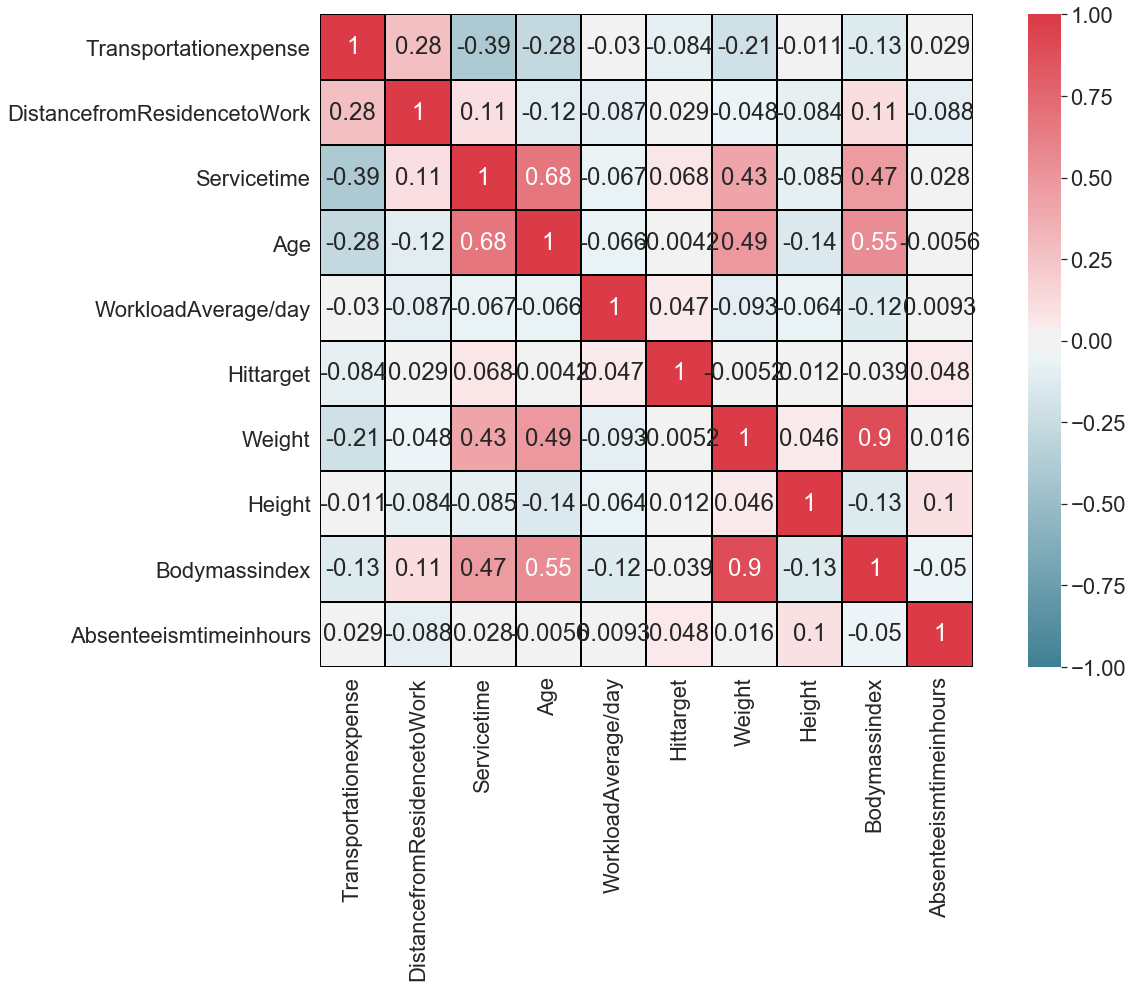

In [48]:
# Correlation matrix
#generating correlation matrix
corr=data_corr.corr()

#Setting up the pane or matrix size
f, ax = plt.subplots(figsize=(20,12)) 

#Plot using Seaborn library
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),\
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

#we see that weight is highly correlated tobody mass index so lets remove weight

In [49]:
data=data.drop(['Weight','ID'],axis=1)

In [50]:
data = data.astype("float")

In [51]:
data.head()

,Reasonforabsence,Monthofabsence,Dayoftheweek,Seasons,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverage/day,Hittarget,Disciplinaryfailure,Education,Son,Socialdrinker,Socialsmoker,Pet,Height,Bodymassindex,Absenteeismtimeinhours
0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239.554,97.0,0.0,1.0,2.0,1.0,0.0,1.0,172.0,30.0,4.0
1,0.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239.554,97.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,31.0,0.0
2,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239.554,97.0,0.0,1.0,0.0,1.0,0.0,0.0,170.0,31.0,2.0
3,7.0,7.0,5.0,1.0,279.0,5.0,14.0,39.0,239.554,97.0,0.0,1.0,2.0,1.0,1.0,0.0,168.0,24.0,4.0
4,23.0,7.0,5.0,1.0,289.0,36.0,13.0,33.0,239.554,97.0,0.0,1.0,2.0,1.0,0.0,1.0,172.0,30.0,2.0


In [52]:
#pip install statsmodels

In [53]:
# now let us see anova test for categorical varibles

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats

In [54]:

formula = 'Absenteeismtimeinhours ~ C(Seasons)+C(Monthofabsence)+C(Pet)+C(Son)+C(Socialdrinker)+C(Reasonforabsence)+C(Dayoftheweek)+C(Disciplinaryfailure)+C(Education)+C(Socialsmoker)  '

In [55]:
model = ols(formula, data=data).fit()

In [56]:
aov_table = anova_lm(model, typ=2)

In [57]:
aov_table

,sum_sq,df,F,PR(>F)
C(Seasons),181.340213,3.0,0.425497,7.347846e-01
C(Monthofabsence),1732.139913,12.0,1.016075,4.318543e-01
C(Pet),1020.963129,5.0,1.437355,2.086715e-01
C(Son),2018.651417,4.0,3.552429,7.032559e-03
C(Socialdrinker),0.004408,1.0,0.000031,9.955570e-01
C(Reasonforabsence),22338.136232,27.0,5.823810,6.289072e-18
C(Dayoftheweek),902.179081,4.0,1.587657,1.757945e-01
C(Disciplinaryfailure),1213.144673,1.0,8.539582,3.590547e-03
C(Education),131.861738,3.0,0.309401,8.186053e-01
C(Socialsmoker),177.193243,1.0,1.247301,2.644637e-01


we see that reason of absesnse has valuess less than 0.05, rest all are above 0.05 so we drop all varibles except reason of absense

In [58]:
data=data.drop(['Seasons','Monthofabsence','Pet','Son','Socialdrinker','Dayoftheweek','Disciplinaryfailure','Education','Socialsmoker'],axis=1)

In [59]:
data.head(10)

,Reasonforabsence,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverage/day,Hittarget,Height,Bodymassindex,Absenteeismtimeinhours
0,26.0,289.0,36.0,13.0,33.0,239.554,97.0,172.0,30.0,4.0
1,0.0,118.0,13.0,18.0,50.0,239.554,97.0,NaN,31.0,0.0
2,23.0,179.0,51.0,18.0,38.0,239.554,97.0,170.0,31.0,2.0
3,7.0,279.0,5.0,14.0,39.0,239.554,97.0,168.0,24.0,4.0
4,23.0,289.0,36.0,13.0,33.0,239.554,97.0,172.0,30.0,2.0
5,23.0,179.0,51.0,18.0,38.0,239.554,97.0,170.0,31.0,2.0
6,22.0,361.0,52.0,3.0,28.0,239.554,97.0,172.0,27.0,8.0
7,23.0,260.0,50.0,11.0,36.0,239.554,97.0,168.0,23.0,4.0
8,19.0,155.0,12.0,14.0,34.0,239.554,97.0,NaN,25.0,40.0
9,22.0,235.0,11.0,14.0,37.0,239.554,97.0,172.0,29.0,8.0


# Feature Scaling

In [60]:
# data['Height'] = data['Height'].replace(np.nan,170)
# data['Age'] = data['Age'].replace(np.nan,37)
# data['WorkloadAverage/day'] = data['WorkloadAverage/day'].replace(np.nan,239.555)
# data['Hittarget'] = data['Hittarget'].replace(np.nan,97)
# data['Bodymassindex'] = data['Bodymassindex'].replace(np.nan,28)
# data['Servicetime'] = data['Servicetime'].replace(np.nan,14)
# data['DistancefromResidencetoWork'] = data['DistancefromResidencetoWork'].replace(np.nan,51)
data = data.replace(np.nan,0)

In [61]:
data.head(10)

,Reasonforabsence,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverage/day,Hittarget,Height,Bodymassindex,Absenteeismtimeinhours
0,26.0,289.0,36.0,13.0,33.0,239.554,97.0,172.0,30.0,4.0
1,0.0,118.0,13.0,18.0,50.0,239.554,97.0,0.0,31.0,0.0
2,23.0,179.0,51.0,18.0,38.0,239.554,97.0,170.0,31.0,2.0
3,7.0,279.0,5.0,14.0,39.0,239.554,97.0,168.0,24.0,4.0
4,23.0,289.0,36.0,13.0,33.0,239.554,97.0,172.0,30.0,2.0
5,23.0,179.0,51.0,18.0,38.0,239.554,97.0,170.0,31.0,2.0
6,22.0,361.0,52.0,3.0,28.0,239.554,97.0,172.0,27.0,8.0
7,23.0,260.0,50.0,11.0,36.0,239.554,97.0,168.0,23.0,4.0
8,19.0,155.0,12.0,14.0,34.0,239.554,97.0,0.0,25.0,40.0
9,22.0,235.0,11.0,14.0,37.0,239.554,97.0,172.0,29.0,8.0


In [62]:
cname.remove("Weight")
#Nomalisation
for i in cname:
    print(i)
    data[i] = (data[i] - min(data[i]))/(max(data[i]) - min(data[i]))

Transportationexpense
DistancefromResidencetoWork
Servicetime
Age
WorkloadAverage/day
Hittarget
Height
Bodymassindex
Absenteeismtimeinhours


In [63]:
data.head(20)

,Reasonforabsence,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverage/day,Hittarget,Height,Bodymassindex,Absenteeismtimeinhours
0,26.0,0.764550,0.659574,0.541667,0.622642,0.697893,0.97,0.982857,0.578947,0.033333
1,0.0,0.312169,0.170213,0.750000,0.943396,0.697893,0.97,0.000000,0.631579,0.000000
2,23.0,0.473545,0.978723,0.750000,0.716981,0.697893,0.97,0.971429,0.631579,0.016667
3,7.0,0.738095,0.000000,0.583333,0.735849,0.697893,0.97,0.960000,0.263158,0.033333
4,23.0,0.764550,0.659574,0.541667,0.622642,0.697893,0.97,0.982857,0.578947,0.016667
5,23.0,0.473545,0.978723,0.750000,0.716981,0.697893,0.97,0.971429,0.631579,0.016667
6,22.0,0.955026,1.000000,0.125000,0.528302,0.697893,0.97,0.982857,0.421053,0.066667
7,23.0,0.687831,0.957447,0.458333,0.679245,0.697893,0.97,0.960000,0.210526,0.033333
8,19.0,0.410053,0.148936,0.583333,0.641509,0.697893,0.97,0.000000,0.315789,0.333333
9,22.0,0.621693,0.127660,0.583333,0.698113,0.697893,0.97,0.982857,0.526316,0.066667


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
Pro_X = data.drop(['Absenteeismtimeinhours'], axis=1)
Pro_Y = data['Absenteeismtimeinhours']

X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(Pro_X,Pro_Y, test_size=0.2)

In [66]:
print(X_TRAIN.shape)
print(X_TEST.shape)
print(Y_TRAIN.shape)
print(Y_TEST.shape)

(592, 9)
(148, 9)
(592,)
(148,)


In [68]:
# Function to calculate root mean square error
def rmse (y_true,y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [69]:
def model_test(model):
    model.fit(X_TRAIN,Y_TRAIN)
    predictions = model.predict(X_TEST)
    model_rsme = rmse(Y_TEST,predictions)
    return model_rsme

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
lr = LinearRegression()
lr_rsme = model_test(lr)
print(" the root mean squared error for linear regression is:", lr_rsme)

 the root mean squared error for linear regression is: 0.1285882855613176


In [72]:
knn = KNeighborsRegressor(n_neighbors=5)
knn_rsme = model_test(knn)
print(" the root mean squared error for K nearest neighbors is:", knn_rsme)

 the root mean squared error for K nearest neighbors is: 0.11486985062488148


In [73]:
svm = SVR()
svm_rsme = model_test(svm)
print(" the root mean squared error for Support vector machine is:", svm_rsme)

 the root mean squared error for Support vector machine is: 0.13065118021806432


In [74]:
tree = DecisionTreeRegressor()
tree_rsme = model_test(tree)
print(" the root mean squared error for decision tree is:", tree_rsme)

 the root mean squared error for decision tree is: 0.15276785066708662


In [75]:
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
rf_rsme = model_test(rf)
gb_rsme = model_test(gb)
print(" the root mean squared error for randoom forest is:", rf_rsme)
print(" the root mean squared error for gradient boosting is:", gb_rsme)

 the root mean squared error for randoom forest is: 0.12911239857709034
 the root mean squared error for gradient boosting is: 0.12845731852463105


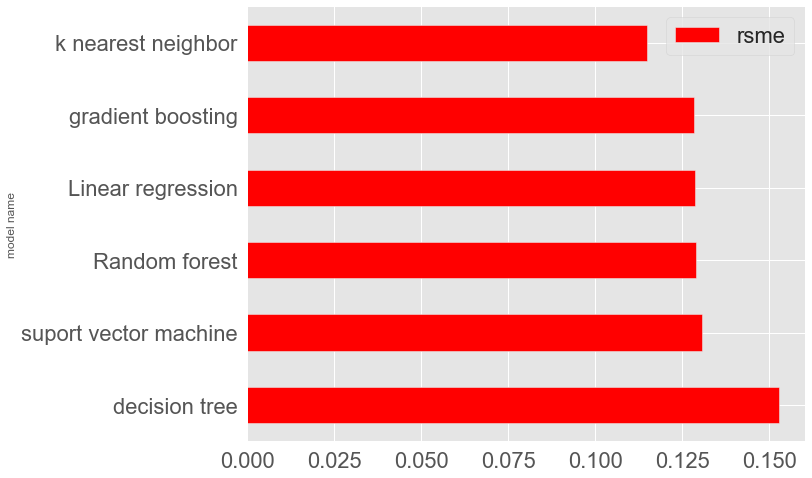

In [76]:
# Plotting in the graph of the rootmean square

figsize(10,8)

plt.style.use("ggplot")
model_comparison = pd.DataFrame({"model name":["Linear regression", "k nearest neighbor", "suport vector machine",
                                              "decision tree", "Random forest", "gradient boosting"],
                                "rsme": [lr_rsme,knn_rsme,svm_rsme,tree_rsme,rf_rsme,gb_rsme]})
model_comparison = model_comparison.sort_values("rsme", ascending=False).plot(x="model name", y="rsme", color="red", kind="barh")

# Hyper parameter Tuning